<a href="https://colab.research.google.com/github/Magikis/project-deep-learning/blob/master/ProjectDeepLearning_pytorchCIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
%pylab inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

Populating the interactive namespace from numpy and matplotlib
cuda:0


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(*([(0.5,) * 3] * 2))
])

trainset = torchvision.datasets.CIFAR10(
    root='~/datasets',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=128,
    shuffle=True,
    num_workers=10
)

testset = torchvision.datasets.CIFAR10(
    root='~/datasets',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=128,
    shuffle=True,
    num_workers=10
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([128, 3, 32, 32])
torch.Size([3072])


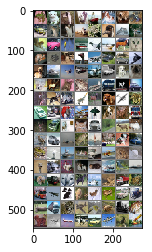

['frog',
 'dog',
 'bird',
 'dog',
 'ship',
 'dog',
 'cat',
 'frog',
 'car',
 'frog',
 'cat',
 'truck',
 'frog',
 'bird',
 'ship',
 'deer',
 'dog',
 'car',
 'bird',
 'ship',
 'plane',
 'ship',
 'horse',
 'cat',
 'dog',
 'frog',
 'cat',
 'bird',
 'plane',
 'car',
 'car',
 'plane',
 'dog',
 'ship',
 'plane',
 'truck',
 'plane',
 'car',
 'dog',
 'cat',
 'dog',
 'deer',
 'cat',
 'frog',
 'ship',
 'truck',
 'horse',
 'car',
 'deer',
 'cat',
 'truck',
 'plane',
 'deer',
 'dog',
 'plane',
 'frog',
 'car',
 'car',
 'cat',
 'plane',
 'plane',
 'dog',
 'frog',
 'truck',
 'deer',
 'car',
 'deer',
 'cat',
 'car',
 'deer',
 'deer',
 'cat',
 'bird',
 'car',
 'ship',
 'frog',
 'ship',
 'horse',
 'dog',
 'car',
 'frog',
 'dog',
 'ship',
 'ship',
 'truck',
 'plane',
 'frog',
 'cat',
 'bird',
 'truck',
 'cat',
 'cat',
 'cat',
 'ship',
 'bird',
 'ship',
 'dog',
 'truck',
 'plane',
 'horse',
 'ship',
 'frog',
 'truck',
 'frog',
 'truck',
 'plane',
 'cat',
 'bird',
 'dog',
 'frog',
 'car',
 'truck',
 'deer'

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(
        np.transpose(npimg, (1, 2, 0))
    )
    plt.show()



dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(images[0].view(-1).shape)

imshow(torchvision.utils.make_grid(images))

[classes[x] for x in labels]

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class BasicNet(nn.Module):
    def __init__(self):
        super(BasicNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 2000)
        self.fc2 = nn.Linear(2000, 100)
        self.fc3 = nn.Linear(100,10)
    
    def forward(self, x):
#         print(x.shape)
        x = x.view(-1, 3 * 32 * 32)
#         print(x.shape)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
net = BasicNet().to(device)


In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
%%time
for epoch in range(40):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 60 == 59:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished traning')

[1,    60] loss: 0.066
[1,   120] loss: 0.062
[1,   180] loss: 0.060
[1,   240] loss: 0.058
[1,   300] loss: 0.058
[1,   360] loss: 0.056
[2,    60] loss: 0.056
[2,   120] loss: 0.056
[2,   180] loss: 0.055
[2,   240] loss: 0.055
[2,   300] loss: 0.054
[2,   360] loss: 0.054
[3,    60] loss: 0.054
[3,   120] loss: 0.054
[3,   180] loss: 0.053
[3,   240] loss: 0.053
[3,   300] loss: 0.053
[3,   360] loss: 0.053
[4,    60] loss: 0.053
[4,   120] loss: 0.052
[4,   180] loss: 0.053
[4,   240] loss: 0.053
[4,   300] loss: 0.053
[4,   360] loss: 0.052
[5,    60] loss: 0.052
[5,   120] loss: 0.052
[5,   180] loss: 0.052
[5,   240] loss: 0.051
[5,   300] loss: 0.051
[5,   360] loss: 0.052
[6,    60] loss: 0.051
[6,   120] loss: 0.051
[6,   180] loss: 0.051
[6,   240] loss: 0.051
[6,   300] loss: 0.051
[6,   360] loss: 0.051
[7,    60] loss: 0.050
[7,   120] loss: 0.050
[7,   180] loss: 0.050
[7,   240] loss: 0.051
[7,   300] loss: 0.050
[7,   360] loss: 0.051
[8,    60] loss: 0.051
[8,   120] 

In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [15]:
class_correct = [0.] * len(classes)
class_total = [0.] * len(classes)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
#         c = 
        for l, p in zip(labels, predicted):
            class_correct[l] += int(l == p)
            class_total[l] += 1

            
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))       

Accuracy of plane : 58 %
Accuracy of   car : 69 %
Accuracy of  bird : 42 %
Accuracy of   cat : 35 %
Accuracy of  deer : 45 %
Accuracy of   dog : 44 %
Accuracy of  frog : 63 %
Accuracy of horse : 64 %
Accuracy of  ship : 72 %
Accuracy of truck : 62 %


In [18]:
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[2912.,  242.,  256.,  190.,  119.,  118.,   99.,  182.,  616.,  266.],
        [ 167., 3480.,   74.,   97.,   62.,   80.,  104.,  131.,  268.,  537.],
        [ 400.,  155., 2116.,  278.,  562.,  312.,  589.,  317.,  155.,  116.],
        [ 176.,  163.,  411., 1773.,  268., 1005.,  606.,  214.,  181.,  203.],
        [ 241.,  101.,  653.,  230., 2290.,  229.,  597.,  408.,  130.,  121.],
        [ 108.,  128.,  436.,  818.,  288., 2226.,  403.,  298.,  167.,  128.],
        [  50.,   86.,  359.,  411.,  401.,  243., 3176.,  119.,   62.,   93.],
        [ 163.,  109.,  264.,  225.,  313.,  243.,  129., 3227.,   97.,  230.],
        [ 429.,  277.,   70.,   98.,   91.,  116.,   40.,   60., 3617.,  202.],
        [ 220.,  743.,   73.,  112.,   52.,  115.,   88.,  188.,  300., 3109.]])
